# Random Forest, Naive Bayes, SVM

## 1 - Data Preprocessing

### 1.1 - Load the Dataset

In [5]:
import pandas as pd
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/crowdfunding_campaign.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CampaignID           100000 non-null  object 
 1   GoalAmount           100000 non-null  int64  
 2   RaisedAmount         100000 non-null  float64
 3   DurationDays         100000 non-null  int64  
 4   NumBackers           100000 non-null  int64  
 5   Category             100000 non-null  object 
 6   LaunchMonth          100000 non-null  object 
 7   Country              100000 non-null  object 
 8   Currency             100000 non-null  object 
 9   OwnerExperience      100000 non-null  int64  
 10  VideoIncluded        100000 non-null  object 
 11  SocialMediaPresence  100000 non-null  int64  
 12  NumUpdates           100000 non-null  int64  
 13  IsSuccessful         100000 non-null  int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 10.7+ MB
None


In [6]:
df.head()

,CampaignID,GoalAmount,RaisedAmount,DurationDays,NumBackers,Category,LaunchMonth,Country,Currency,OwnerExperience,VideoIncluded,SocialMediaPresence,NumUpdates,IsSuccessful
0,CID_00000,76159,73518.028955,15,1903,Film,September,Australia,GBP,11,Yes,41758,3,0
1,CID_00001,69394,60068.683288,49,469,Art,October,Australia,GBP,7,Yes,79112,48,0
2,CID_00002,18652,22958.153470,58,148,Film,February,USA,EUR,17,No,3942,9,1
3,CID_00003,19487,24229.048390,39,780,Film,October,Germany,AUD,10,No,22047,35,1
4,CID_00004,26734,17984.630311,68,1622,Games,September,Australia,AUD,12,Yes,72568,17,0


### 1.2 - Handle Missing Values

In [7]:
df.isnull().sum()

,0
CampaignID,0
GoalAmount,0
RaisedAmount,0
DurationDays,0
NumBackers,0
Category,0
LaunchMonth,0
Country,0
Currency,0
OwnerExperience,0


In [8]:
df.describe()

,GoalAmount,RaisedAmount,DurationDays,NumBackers,OwnerExperience,SocialMediaPresence,NumUpdates,IsSuccessful
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50538.001310,50598.121803,52.047370,1003.347340,9.489130,50077.301010,24.483230,0.500940
std,28613.822592,33255.277493,21.653238,574.485153,5.763538,28767.521522,14.413833,0.500002
min,1000.000000,528.632349,15.000000,10.000000,0.000000,100.000000,0.000000,0.000000
25%,25724.750000,23396.500017,33.000000,505.000000,4.000000,25276.750000,12.000000,0.000000
50%,50706.000000,45980.674476,52.000000,1003.000000,9.000000,50024.500000,25.000000,1.000000
75%,75316.000000,72790.183158,71.000000,1502.000000,14.000000,74934.250000,37.000000,1.000000
max,99999.000000,149238.361559,89.000000,1999.000000,19.000000,99999.000000,49.000000,1.000000


In [9]:
num_columns = []
cat_columns = []
for i in df.select_dtypes(include = "number"):
  num_columns.append(i)
for i in df.iloc[:, 1:].select_dtypes(include = "O"):
  cat_columns.append(i)

print(f"Numerical Columns \t: {num_columns}")
print(f"Categarical Columns \t: {cat_columns}")

Numerical Columns 	: ['GoalAmount', 'RaisedAmount', 'DurationDays', 'NumBackers', 'OwnerExperience', 'SocialMediaPresence', 'NumUpdates', 'IsSuccessful']
Categarical Columns 	: ['Category', 'LaunchMonth', 'Country', 'Currency', 'VideoIncluded']


In [10]:
# Find Unique Values
for i in cat_columns:
  print(f"Unique Values for {i}\t: {list(df[i].unique())}\n")

Unique Values for Category	: ['Film', 'Art', 'Games', 'Music', 'Technology']

Unique Values for LaunchMonth	: ['September', 'October', 'February', 'April', 'June', 'July', 'March', 'January', 'August', 'December', 'November', 'May']

Unique Values for Country	: ['Australia', 'USA', 'Germany', 'UK', 'Canada']

Unique Values for Currency	: ['GBP', 'EUR', 'AUD', 'CAD', 'USD']

Unique Values for VideoIncluded	: ['Yes', 'No']



### 1.3 - Encode Categorical Features

In [11]:
# Label Encoded with Binary column
df["VideoIncluded"] = df["VideoIncluded"].map({"Yes" : 1, "No" : 0})

In [12]:
# Label Encoded with ordinal column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["LaunchMonth"] = le.fit_transform(df["LaunchMonth"])

In [13]:
# Onehot Encoding
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()
one_hot_enc_cols = ["Category", "Country", "Currency"]
for i in one_hot_enc_cols:
  df[i] = onehot.fit_transform(df[[i]]).toarray()

In [14]:
dff = df.copy()
dff.drop("CampaignID", axis = 1, inplace = True)
dff.head()

,GoalAmount,RaisedAmount,DurationDays,NumBackers,Category,LaunchMonth,Country,Currency,OwnerExperience,VideoIncluded,SocialMediaPresence,NumUpdates,IsSuccessful
0,76159,73518.028955,15,1903,0.0,11,0.0,0.0,11,1,41758,3,0
1,69394,60068.683288,49,469,0.0,10,0.0,0.0,7,1,79112,48,0
2,18652,22958.153470,58,148,0.0,3,1.0,0.0,17,0,3942,9,1
3,19487,24229.048390,39,780,0.0,10,0.0,1.0,10,0,22047,35,1
4,26734,17984.630311,68,1622,0.0,11,0.0,1.0,12,1,72568,17,0


### 1.4 - Feature Selection

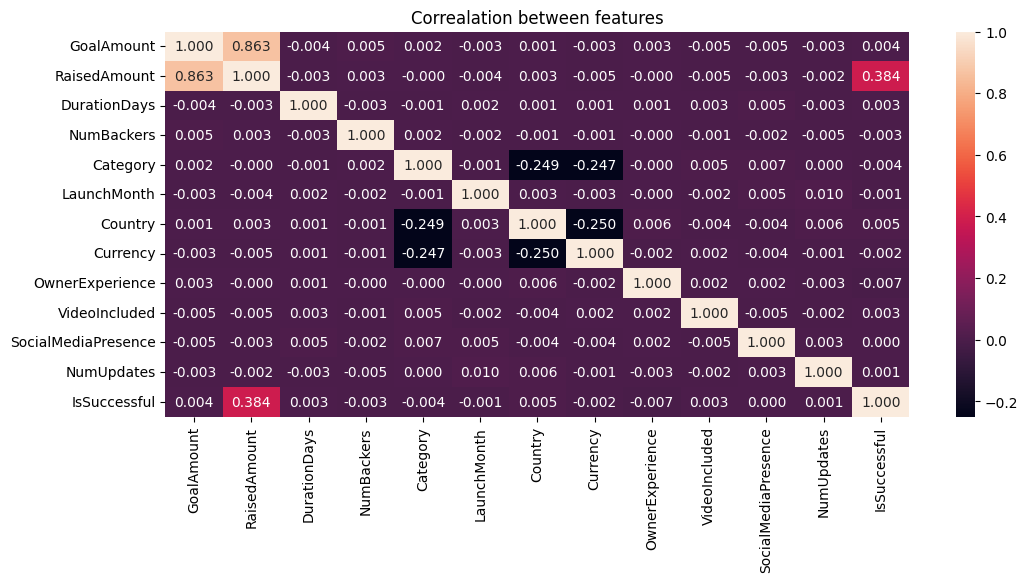

In [15]:
# Select the Feature
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (12, 5))
plt.title("Correalation between features")
sns.heatmap(dff.corr(), annot = True, fmt = ".3f")
plt.show()

In [16]:
# Select K best
from sklearn.feature_selection import SelectKBest, f_classif
X = dff.drop(columns = ["IsSuccessful"])
y = df["IsSuccessful"]
selector = SelectKBest(score_func = f_classif, k = 4)
selector.fit(X, y)

top_features = X.columns[selector.get_support()]
print(f"Selected Features - :{list(top_features)}")

Selected Features - :['RaisedAmount', 'Category', 'Country', 'OwnerExperience']


### 1.5 - Data Splitting

In [17]:
# Split the Data
from sklearn.model_selection import train_test_split
X = dff[list(top_features)]
y = df["IsSuccessful"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
print(f"X_train Shape \t- {X_train.shape}")
print(f"X_test Shape \t- {X_test.shape}")

print(f"y_train Shape \t- {y_train.shape}")
print(f"y_test Shape \t- {y_test.shape}")

X_train Shape 	- (75000, 4)
X_test Shape 	- (25000, 4)
y_train Shape 	- (75000,)
y_test Shape 	- (25000,)


### 1.6 - Feature Scaling

In [18]:
# scaling the train and test data set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
y_train_scaled = sc.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = sc.transform(y_test.values.reshape(-1, 1))

## 2 - Random Forest - Model Building and Evaluation

### 2.1 - Model Building

In [19]:
# RANDOM FOREST MODEL
from sklearn.ensemble import RandomForestClassifier
rfcls = RandomForestClassifier(n_estimators = 50, max_depth = 3, random_state = 2)
rfcls.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=3, n_estimators=50, random_state=2)

### 2.2 - Model Evaluation

In [20]:
# Evalution of Random forest classifier
from sklearn.metrics import accuracy_score
y_pred = rfcls.predict(X_test)
accuracy_score_rf = accuracy_score(y_test, y_pred)
print(f"Accuracy Score - {accuracy_score_rf}")

Accuracy Score - 0.50168


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


## 3 - Naive Bayes - Model Building and Evaluation

### 3.1 - Model Building

In [21]:
#Naive Bayes implementing
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

### 3.2 - Model Evaluation

In [22]:
# GuassianNB model Evaluation
y_pred_NB = model.predict(X_test)
acc_score_Guassian_NB = accuracy_score(y_test, y_pred_NB)
print(f"Accuracy Score - {acc_score_Guassian_NB}")

Accuracy Score - 0.66556


In [23]:
# MultinomialNB model evaluation
from sklearn.naive_bayes import MultinomialNB
model_MNB = MultinomialNB()
model_MNB.fit(X_train, y_train)
y_pred_MNB = model_MNB.predict(X_test)
acc_score_Mutinomial_NB = accuracy_score(y_test, y_pred_MNB)
print(f"Accuracy Score - {acc_score_Mutinomial_NB}")

Accuracy Score - 0.61036


In [24]:
# bernoulliNB model Evaluation
from sklearn.naive_bayes import BernoulliNB
model_BNB = BernoulliNB()
model_BNB.fit(X_train, y_train)
y_pred_BNB = model_BNB.predict(X_test)
acc_score_BNB = accuracy_score(y_test, y_pred_BNB)
print(f"Accuracy Score - {acc_score_BNB}")

##After Evaluation 3 models of Naive Bayes we acn choose the highest accuracy having model GuassianNB

Accuracy Score - 0.50204


## 4 - Support Vector Machine (SVM) - Model Building and Evaluation

### 4.1 - Model Building and Evaluation

In [25]:
# SVM building
from sklearn.svm import SVC
cls = SVC(kernel = "linear", max_iter = 1000)
cls.fit(X, y)
y_pred = cls.predict(X_test)
acc_score_svm = accuracy_score(y_test, y_pred)
print(f"Accuracy Score for 'linear' - {acc_score_svm}\n\n")

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy Score for 'linear' - 0.43052




## 5 - Comparison and Analysis

### 5.1 - Accuracy Comparisons

In [27]:
# Comparison Analysis
print(f"Accuracy score of random forest : {accuracy_score_rf}")
print(f"Accuracy score of Guassian Naive Bayes : {acc_score_Guassian_NB}")
print(f"Accuracy score of Multinomial Naive Bayes : {acc_score_Mutinomial_NB}")
print(f"Accuracy score of Bernoulli Naive Bayes : {acc_score_BNB}")
print(f"Accuracy score of SVM : {acc_score_svm}")

Accuracy score of random forest : 0.50168
Accuracy score of Guassian Naive Bayes : 0.66556
Accuracy score of Multinomial Naive Bayes : 0.61036
Accuracy score of Bernoulli Naive Bayes : 0.50204
Accuracy score of SVM : 0.43052


### 5.2 - Discussions of model
*  Gaussian Naive Bayes performed the best with an accuracy score of 0.66556
*  It is a continuous and follow a Gaussian distribution.

### 5.3 - Strength and Weakness
#### Strengths
*  Works well with continuous features.
*  Fast and quick Computational speed.
*  Requires minimal data preprocessing.

#### Weakness
*  It not hold the True in some dataset.
*  Sensitive in incorrect data.